In [1]:
import pandas as pd
import numpy as np

In [6]:
! ls outputs/unimundo_outputs/human_12000_biogrid-mouse_12000_biogrid/

C_k_10_alpha_0.0.tsv   F_k_10_alpha_0.0.tsv   P_k_10_alpha_0.0.tsv
C_k_10_alpha_0.05.tsv  F_k_10_alpha_0.05.tsv  P_k_10_alpha_0.05.tsv
C_k_10_alpha_0.1.tsv   F_k_10_alpha_0.1.tsv   P_k_10_alpha_0.1.tsv
C_k_10_alpha_0.2.tsv   F_k_10_alpha_0.2.tsv   P_k_10_alpha_0.2.tsv
C_k_10_alpha_0.4.tsv   F_k_10_alpha_0.4.tsv   P_k_10_alpha_0.4.tsv
C_k_10_alpha_0.6.tsv   F_k_10_alpha_0.6.tsv   P_k_10_alpha_0.6.tsv
C_k_10_alpha_0.8.tsv   F_k_10_alpha_0.8.tsv   P_k_10_alpha_0.8.tsv
C_k_10_alpha_1.0.tsv   F_k_10_alpha_1.0.tsv   P_k_10_alpha_1.0.tsv
C_k_15_alpha_0.0.tsv   F_k_15_alpha_0.0.tsv   P_k_15_alpha_0.0.tsv
C_k_15_alpha_0.05.tsv  F_k_15_alpha_0.05.tsv  P_k_15_alpha_0.05.tsv
C_k_15_alpha_0.1.tsv   F_k_15_alpha_0.1.tsv   P_k_15_alpha_0.1.tsv
C_k_15_alpha_0.2.tsv   F_k_15_alpha_0.2.tsv   P_k_15_alpha_0.2.tsv
C_k_15_alpha_0.4.tsv   F_k_15_alpha_0.4.tsv   P_k_15_alpha_0.4.tsv
C_k_15_alpha_0.6.tsv   F_k_15_alpha_0.6.tsv   P_k_15_alpha_0.6.tsv
C_k_15_alpha_0.8.tsv   F_k_15_alpha_0.8.tsv   P_k_15_alpha_0

In [20]:
ks = [5, 10, 15, 20, 25, 30, 35]
alphas = ["0.05", "0.1", "0.2", "0.4", "0.6", "0.8", "1.0"]

def generate_table_results(kvals, alphas, gos, folder):
    """
    Generating the table from alphas and kvals
    """
    results = {"gos": [], 
               "ks": [], 
               "alphas": [], 
               "mean_acc": [], 
               "std_acc": [], 
               "mean_f1": [], 
               "std_f1": []}
    for go in gos:
        print(f"\tGO: {go}")
        for k in ks:
            print(f"\t\t K: {k}")
            for a in alphas:
                results["gos"].append(go)
                results["ks"].append(k)
                results["alphas"].append(a)
                
                df = pd.read_csv(f"{folder}/{go}_k_{k}_alpha_{a}.tsv", sep = "\t")
                
                results["mean_acc"].append(df["acc"].mean())
                results["mean_f1"].append(df["f1"].mean())
                results["std_acc"].append(df["acc"].std())
                results["std_f1"].append(df["f1"].std())
                print(f"\t\t\t ALPHA: {a}, Accuracy: {df['acc'].mean()} +- {df['acc'].std()}"
                      + f"\t\t\t                   F1: {df['f1'].mean()} +- {df['f1'].std()}")
    df = pd.DataFrame(results)
    return df
                
        

In [168]:
df_hm = generate_table_results(ks, alphas, ["P", "F", "C"], "outputs/unimundo_outputs/bakers_yeast_biogrid-fission_yeast_biogrid/")

	GO: P
		 K: 5
			 ALPHA: 0.05, Accuracy: 0.28739556644758824 +- 0.024041549586507137			                   F1: 0.3398513028325479 +- 0.043294813101880145
			 ALPHA: 0.1, Accuracy: 0.28742898518436 +- 0.040240283389596274			                   F1: 0.32636194265569884 +- 0.015536699224860052
			 ALPHA: 0.2, Accuracy: 0.2788849281497159 +- 0.030019120376902898			                   F1: 0.34479784093770316 +- 0.022524541890338402
			 ALPHA: 0.4, Accuracy: 0.29703687200623813 +- 0.04697123938957936			                   F1: 0.33991026813698155 +- 0.013716859559676093
			 ALPHA: 0.6, Accuracy: 0.28849281497159407 +- 0.01588059695858937			                   F1: 0.3108478955514359 +- 0.026411940628433675
			 ALPHA: 0.8, Accuracy: 0.28849281497159407 +- 0.035248552437536836			                   F1: 0.309711077032664 +- 0.026937488254939308
			 ALPHA: 1.0, Accuracy: 0.28739556644758824 +- 0.01054305019125544			                   F1: 0.28735152229038785 +- 0.012939841273950207
		 K: 10
			 ALPHA: 0.

			 ALPHA: 0.05, Accuracy: 0.5655367231638417 +- 0.06010380754744796			                   F1: 0.47007126560674706 +- 0.03115534028491748
			 ALPHA: 0.1, Accuracy: 0.5980225988700566 +- 0.08890791375294253			                   F1: 0.46972396349861995 +- 0.04009440192361291
			 ALPHA: 0.2, Accuracy: 0.635593220338983 +- 0.03893799082511359			                   F1: 0.4604550904289585 +- 0.009402229508816274
			 ALPHA: 0.4, Accuracy: 0.6587570621468927 +- 0.036403980120105234			                   F1: 0.4614663257153303 +- 0.029067159966292958
			 ALPHA: 0.6, Accuracy: 0.6700564971751414 +- 0.010311701835279094			                   F1: 0.4322808357934881 +- 0.023392363604976037
			 ALPHA: 0.8, Accuracy: 0.6672316384180791 +- 0.01818691367550269			                   F1: 0.4268515859847099 +- 0.018362388080411397
			 ALPHA: 1.0, Accuracy: 0.6692090395480227 +- 0.022094477060182447			                   F1: 0.33974127145233973 +- 0.010387755668697698
		 K: 35
			 ALPHA: 0.05, Accuracy: 0.593502

In [169]:
df_hm_acc = df_hm.drop(["mean_f1", "std_f1"], axis = 1)
df_hm_f1  = df_hm.drop(["mean_acc", "std_acc"], axis = 1)

df_hm_acc = df_hm_acc.rename(columns = {"mean_acc": "Score", "std_acc":"std"})
df_hm_f1 = df_hm_f1.rename(columns = {"mean_f1": "Score", "std_f1": "std"})
df_hm_acc["Metric Used"] = "Accuracy"
df_hm_f1["Metric Used"]  = "F1-max"

df_comp = pd.concat([df_hm_acc, df_hm_f1]).reset_index()
df_comp["std"] = df_comp["std"] 
df_comp

,index,gos,ks,alphas,Score,std,Metric Used
0,0,P,5,0.05,0.287396,0.024042,Accuracy
1,1,P,5,0.1,0.287429,0.040240,Accuracy
2,2,P,5,0.2,0.278885,0.030019,Accuracy
3,3,P,5,0.4,0.297037,0.046971,Accuracy
4,4,P,5,0.6,0.288493,0.015881,Accuracy
...,...,...,...,...,...,...,...
289,142,C,35,0.2,0.466746,0.032813,F1-max
290,143,C,35,0.4,0.456744,0.029204,F1-max
291,144,C,35,0.6,0.426478,0.023658,F1-max
292,145,C,35,0.8,0.431214,0.024084,F1-max


In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "darkgrid")

In [171]:
df_comp

,index,gos,ks,alphas,Score,std,Metric Used
0,0,P,5,0.05,0.287396,0.024042,Accuracy
1,1,P,5,0.1,0.287429,0.040240,Accuracy
2,2,P,5,0.2,0.278885,0.030019,Accuracy
3,3,P,5,0.4,0.297037,0.046971,Accuracy
4,4,P,5,0.6,0.288493,0.015881,Accuracy
...,...,...,...,...,...,...,...
289,142,C,35,0.2,0.466746,0.032813,F1-max
290,143,C,35,0.4,0.456744,0.029204,F1-max
291,144,C,35,0.6,0.426478,0.023658,F1-max
292,145,C,35,0.8,0.431214,0.024084,F1-max


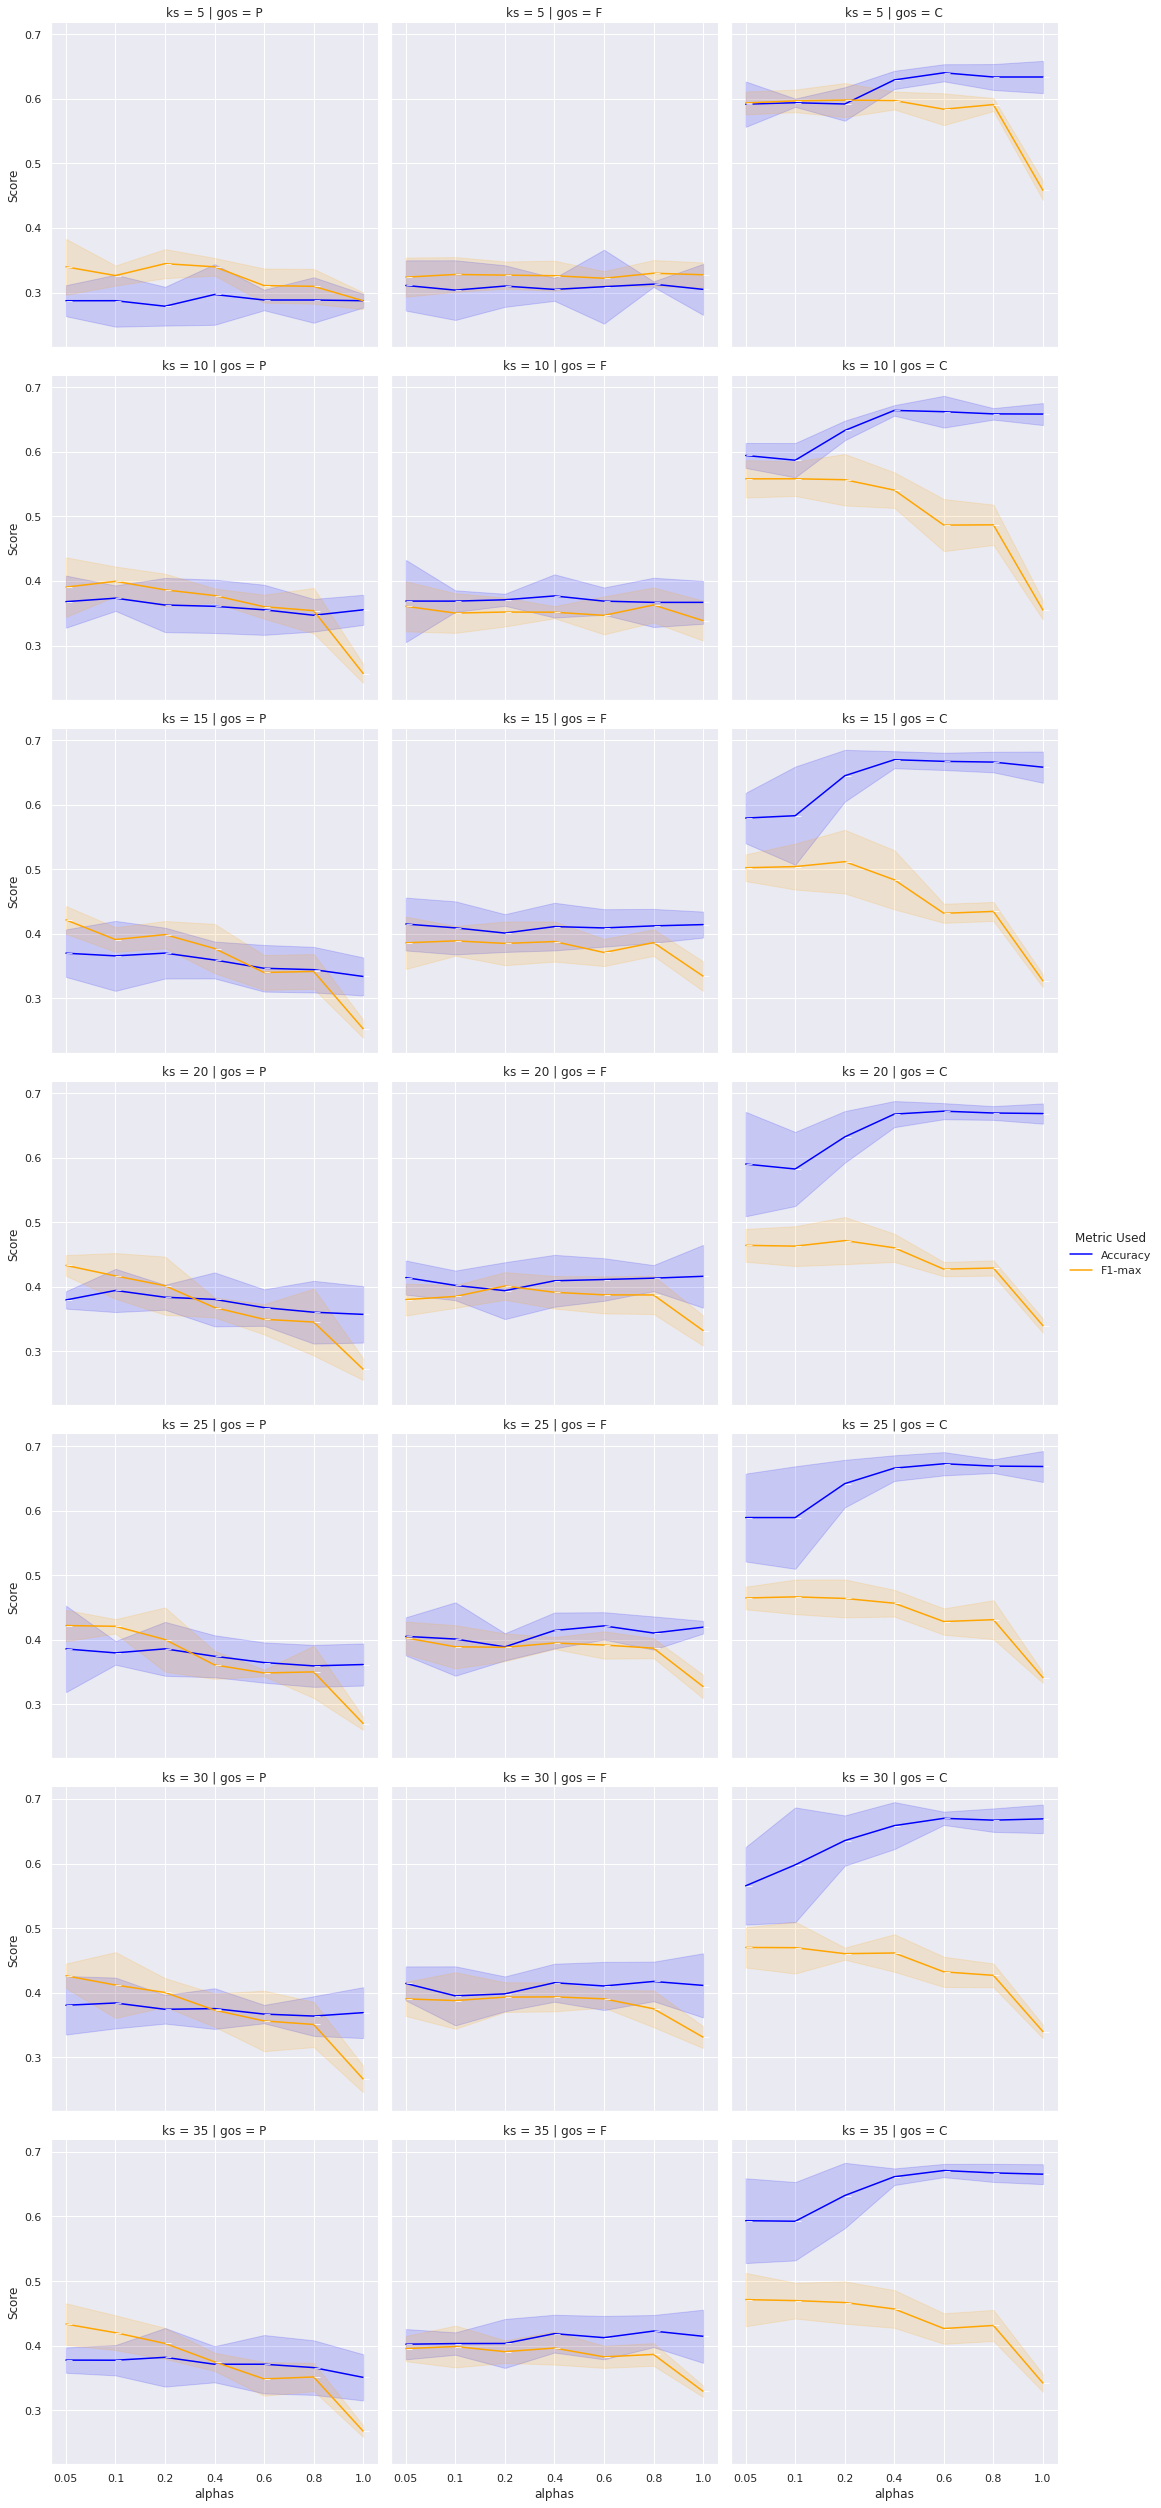

In [172]:
## SEEING THE VARIATION with VARIATION in "alphas"

p = sns.relplot(data = df_comp, x= "alphas", y="Score", col="gos", row="ks",
                hue = "Metric Used", kind = "line", palette=["blue", "orange"], marker = True)
#p.map(sns.lineplot, ci = None)
for i, k in enumerate(ks):
    for j, g in enumerate(["P", "F", "C"]):
        dc = df_comp.loc[(df_comp["ks"] == k) & (df_comp["gos"] == g), :]
        dc_a = dc[dc["Metric Used"] == "Accuracy"]
        dc_f = dc[dc["Metric Used"] == "F1-max"]
        p.axes[i, j].fill_between(dc_a["alphas"], dc_a["Score"] - dc_a["std"], dc_a["Score"] + dc_a["std"], color = "blue", alpha=0.15)
        p.axes[i, j].fill_between(dc_f["alphas"], dc_f["Score"] - dc_f["std"], dc_f["Score"] + dc_f["std"], color = "orange", alpha=0.15)
p.savefig("outputs/unimundo_outputs/bakers_yeast_biogrid-fission_yeast_biogrid/alphas_x_axis.png")


'C'

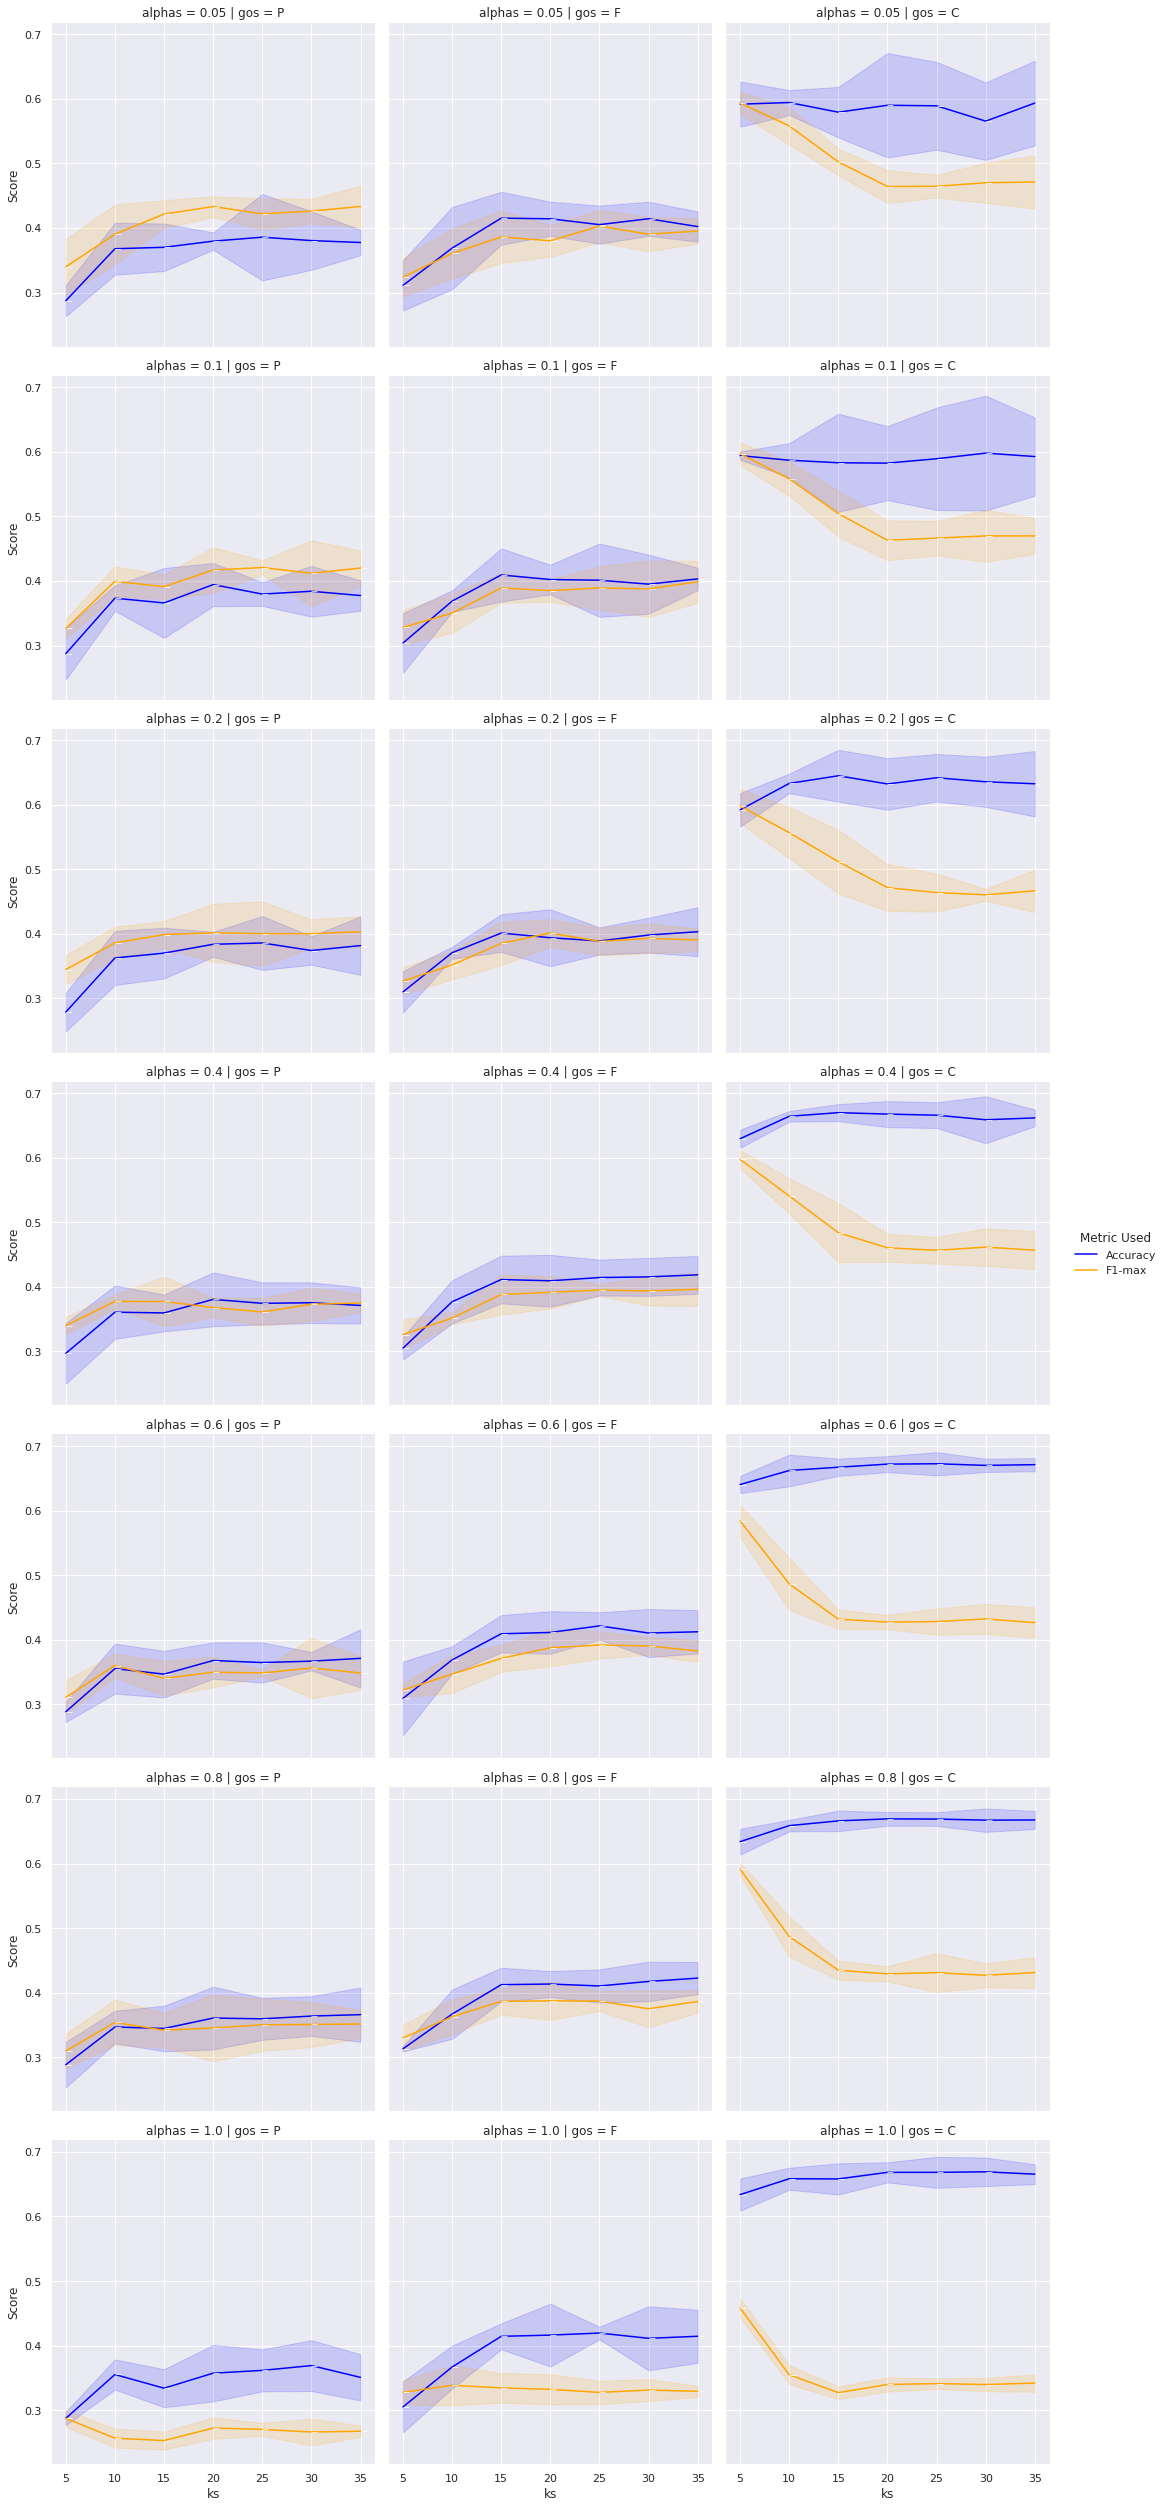

In [173]:
## SEEING THE VARIATION with VARIATION in "ks"

p = sns.relplot(data = df_comp, x= "ks", y="Score", col="gos", row="alphas",
                hue = "Metric Used", kind = "line", palette=["blue", "orange"], marker = True)
p.map(sns.lineplot, ci = None)
for i, a in enumerate(alphas):
    for j, g in enumerate(["P", "F", "C"]):
        dc = df_comp.loc[(df_comp["alphas"] == a) & (df_comp["gos"] == g), :]
        dc_a = dc[dc["Metric Used"] == "Accuracy"]
        dc_f = dc[dc["Metric Used"] == "F1-max"]
        p.axes[i, j].fill_between(dc_a["ks"], dc_a["Score"] - dc_a["std"], dc_a["Score"] + dc_a["std"], color = "blue", alpha=0.15)
        p.axes[i, j].fill_between(dc_f["ks"], dc_f["Score"] - dc_f["std"], dc_f["Score"] + dc_f["std"], color = "orange", alpha=0.15)
p.savefig("outputs/unimundo_outputs/bakers_yeast_biogrid-fission_yeast_biogrid/ks_x_axis.png")
g